In [26]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a80b647c39bfddf57ccd229e8077ab76


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | krabi
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | ankazoabo
Processing Record 6 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | hokitika
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | manitouwadge
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | sao francisco de paula
Processing Record 14 of Set 1 | te anau
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | ust-dzheguta
Processing Record 19 of Set 1 | ruteng
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | grand gaube
Processing Record 22 of Set 1 | gazanjyk
P

Processing Record 32 of Set 4 | lavrentiya
Processing Record 33 of Set 4 | ushtobe
Processing Record 34 of Set 4 | ankang
Processing Record 35 of Set 4 | souillac
Processing Record 36 of Set 4 | longyearbyen
Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | victoria
Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | olinda
Processing Record 43 of Set 4 | napierville
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | barbar
City not found. Skipping...
Processing Record 46 of Set 4 | senador jose porfirio
Processing Record 47 of Set 4 | pangnirtung
Processing Record 48 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 49 of Set 4 | nanortalik
Processing Record 50 of Set 4 | kalmunai
Processing Record 1 of Set 5 | benghazi
Processing Record 2 of Set 5 | karratha
Processing Record 3 of Set 5 | lima
Processing Record 4 of Set 5 |

City not found. Skipping...
Processing Record 20 of Set 8 | hobyo
Processing Record 21 of Set 8 | narsaq
Processing Record 22 of Set 8 | springbok
Processing Record 23 of Set 8 | borda da mata
Processing Record 24 of Set 8 | bourail
Processing Record 25 of Set 8 | kyabe
Processing Record 26 of Set 8 | torbay
Processing Record 27 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 8 | ekuvukeni
Processing Record 29 of Set 8 | baracoa
Processing Record 30 of Set 8 | knysna
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | vila franca do campo
Processing Record 33 of Set 8 | ayan
Processing Record 34 of Set 8 | hatsukaichi
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | hunza
City not found. Skipping...
Processing Record 37 of Set 8 | port augusta
Processing Record 38 of Set 8 | bintulu
Processing Record 39 of Set 8 | chubbuck
Processing Record 40 of Set 8 | melito di porto salvo
Processing Record 41 of Set 8 | s

City not found. Skipping...
Processing Record 5 of Set 12 | ngunguru
Processing Record 6 of Set 12 | longlac
City not found. Skipping...
Processing Record 7 of Set 12 | clarksburg
Processing Record 8 of Set 12 | myitkyina
Processing Record 9 of Set 12 | flinders
Processing Record 10 of Set 12 | kedrovyy
Processing Record 11 of Set 12 | alice springs
Processing Record 12 of Set 12 | olafsvik
City not found. Skipping...
Processing Record 13 of Set 12 | haikou
Processing Record 14 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 15 of Set 12 | mackay
Processing Record 16 of Set 12 | pinega
Processing Record 17 of Set 12 | waw
City not found. Skipping...
Processing Record 18 of Set 12 | dudinka
Processing Record 19 of Set 12 | itapaci
Processing Record 20 of Set 12 | winnemucca
Processing Record 21 of Set 12 | dumai
Processing Record 22 of Set 12 | aksarka
Processing Record 23 of Set 12 | tevaitoa
Processing Record 24 of Set 12 | maple creek
Processing Record 25 of Set 1

In [12]:
len(city_data)

553

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.16,-70.91,53.60,54,75,13.87,CL,2020-01-04 22:29:04
1,Port Elizabeth,39.31,-74.98,57.00,100,90,3.36,US,2020-01-04 22:29:04
2,Krabi,8.06,98.92,75.20,100,20,5.82,TH,2020-01-04 22:29:04
3,Barrow,-38.31,-60.23,77.27,55,75,18.05,AR,2020-01-04 22:29:05
4,Ankazoabo,-22.29,44.51,75.22,69,14,2.89,MG,2020-01-04 22:29:05
5,Hokitika,-42.72,170.96,57.04,65,99,9.84,NZ,2020-01-04 22:29:05
6,Atuona,-9.80,-139.03,81.55,68,5,9.24,PF,2020-01-04 22:29:05
7,Manitouwadge,49.12,-85.84,19.40,92,90,2.55,CA,2020-01-04 22:29:06
8,Mataura,-46.19,168.86,55.99,76,98,27.00,NZ,2020-01-04 22:29:06
9,Chokurdakh,70.62,147.90,-14.71,98,73,0.81,RU,2020-01-04 22:29:06


In [16]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-01-04 22:29:04,-53.16,-70.91,53.60,54,75,13.87
1,Port Elizabeth,US,2020-01-04 22:29:04,39.31,-74.98,57.00,100,90,3.36
2,Krabi,TH,2020-01-04 22:29:04,8.06,98.92,75.20,100,20,5.82
3,Barrow,AR,2020-01-04 22:29:05,-38.31,-60.23,77.27,55,75,18.05
4,Ankazoabo,MG,2020-01-04 22:29:05,-22.29,44.51,75.22,69,14,2.89
5,Hokitika,NZ,2020-01-04 22:29:05,-42.72,170.96,57.04,65,99,9.84
6,Atuona,PF,2020-01-04 22:29:05,-9.80,-139.03,81.55,68,5,9.24
7,Manitouwadge,CA,2020-01-04 22:29:06,49.12,-85.84,19.40,92,90,2.55
8,Mataura,NZ,2020-01-04 22:29:06,-46.19,168.86,55.99,76,98,27.00
9,Chokurdakh,RU,2020-01-04 22:29:06,70.62,147.90,-14.71,98,73,0.81


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

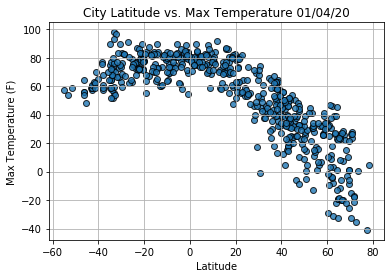

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

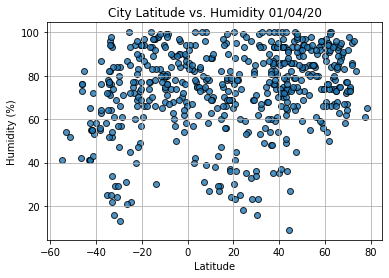

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

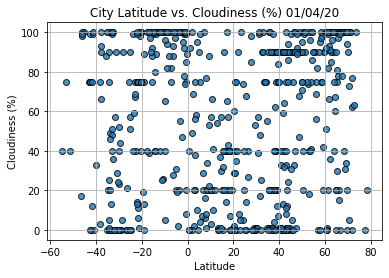

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

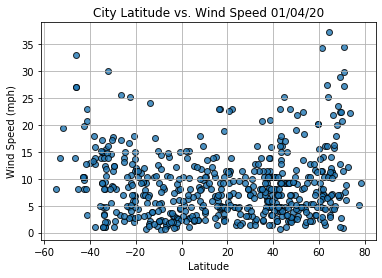

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                       Faanui
Country                        PF
Date          2020-01-04 22:29:07
Lat                        -16.48
Lng                       -151.75
Max Temp                    81.45
Humidity                       77
Cloudiness                    100
Wind Speed                   12.1
Name: 13, dtype: object

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

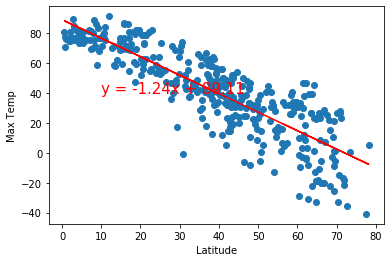

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

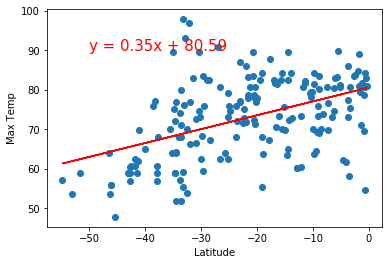

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

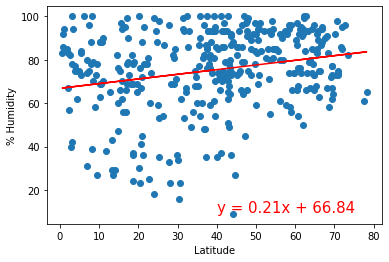

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

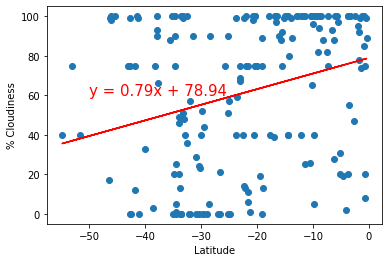

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

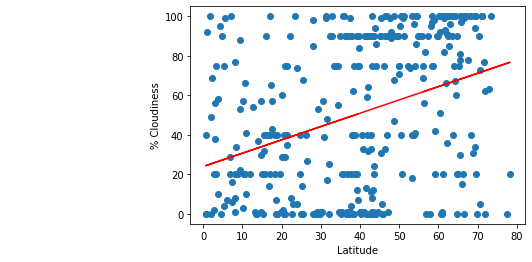

In [49]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

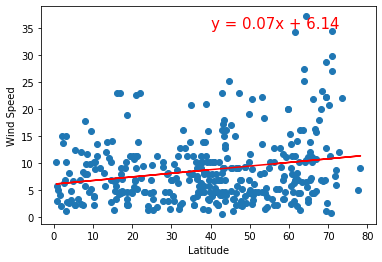

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

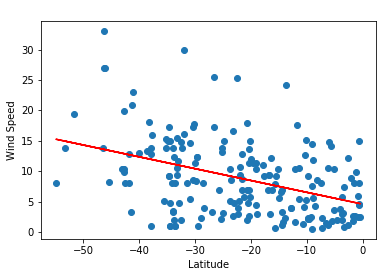

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))